In [1]:
import json
import jsonschema
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def create_add(df, col):
    return df.apply(
        lambda row: row[col]-df[
            df["date"]==row["date"] - pd.Timedelta(1, unit='D')
        ][col].max(),
        axis=1
    )

In [7]:
dfs = []
for month in ["2020.08","2020.09","2020.10","2020.11"]:
    with open("data/kpi_hu/{}.json".format(month), 'r') as myfile:
        data_json = json.load(myfile)
        dfs.append(pd.json_normalize(data_json.values()))
df = pd.concat(dfs)
reduced_df = df[["update","tests","infected_pest","infected_other"]].copy()
reduced_df["update"] = pd.to_datetime(reduced_df["update"], format='%Y.%m.%d. %H:%M')
reduced_df["date"] = reduced_df["update"].dt.date
reduced_df["infected"] = reduced_df["infected_pest"]+reduced_df["infected_other"]
reduced_df["add.tests"] = create_add(reduced_df, "tests")
reduced_df["add.infected"] = create_add(reduced_df, "infected")
reduced_df["add.infected/add.tests"] = reduced_df["add.infected"] / reduced_df["add.tests"] * 100
reduced_df.tail()

,update,tests,infected_pest,infected_other,date,infected,add.tests,add.infected,add.infected/add.tests
24,2020-11-24 09:26:00,1528302,29240,104613,2020-11-24,133853,10144.0,3131.0,30.865536
25,2020-11-25 09:19:00,1548318,29941,107612,2020-11-25,137553,20016.0,3700.0,18.485212
26,2020-11-26 09:19:00,1566619,29464,108738,2020-11-26,138202,18301.0,649.0,3.546254
27,2020-11-26 12:22:00,1580197,29464,108738,2020-11-26,138202,31879.0,649.0,2.035823
28,2020-11-27 09:11:00,1601203,29538,112412,2020-11-27,141950,21006.0,3748.0,17.842521


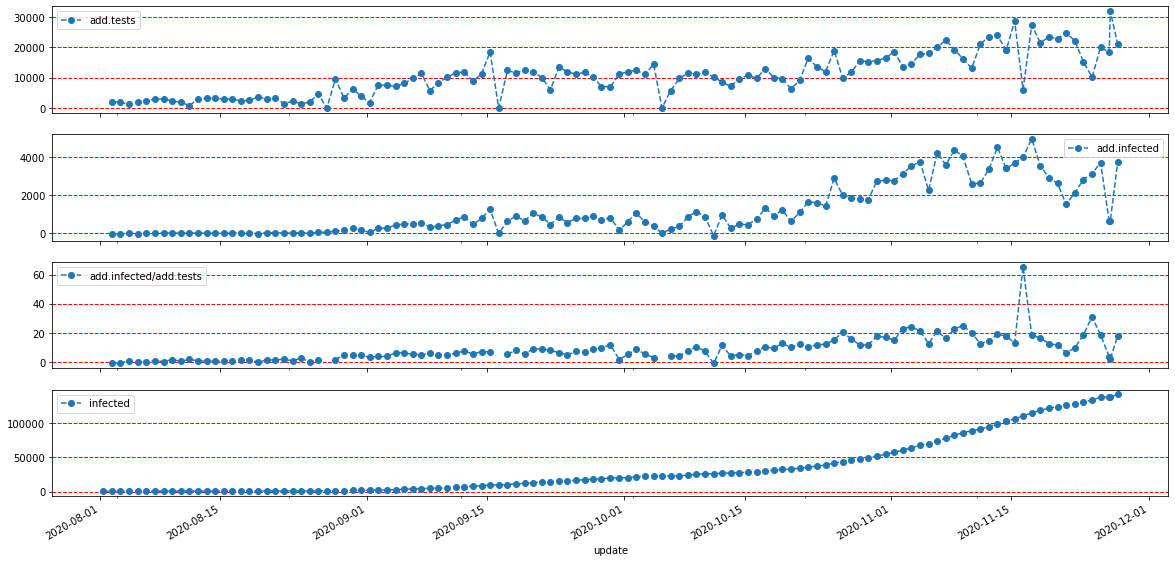

In [8]:
fig, ax = plt.subplots(nrows=4,figsize=(20,10),sharex=True)
#ax[0].set_ylim(0,2100)
#ax[1].set_ylim(1,100)
#ax[1].set_yscale("log")
#ax[2].set_ylim(0,10)
#ax[2].set_yscale("log")
reduced_df.plot(x="update", y="add.tests", ax=ax[0], label="add.tests", style="o--")
reduced_df.plot(x="update", y="add.infected", ax=ax[1], label="add.infected", style="o--")
reduced_df.plot(x="update", y="add.infected/add.tests", ax=ax[2], label="add.infected/add.tests", style="o--")
reduced_df.plot(x="update", y="infected", ax=ax[3], label="infected", style="o--")
ax[0].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[1].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[2].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[3].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
plt.show()